                                                                    Homework Assignment 2

Group Members:
    
a) Aashi Aashi   
b) Aidan Cremins  
c) Juwon Lee  
d) Aarib Mohammed   


In [4]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### Reading the CSV File

In [5]:
NYC_Restaurant = pd.read_csv('NYC_Restaurants.csv',index_col=[0],dtype=str)
NYC_Restaurant.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


# Question 1 -- Create a unique name for each restaurant.

Combine the columns `DBA`, `BUILDING`, `STREET`, `ZIPCODE`, and `BORO` to create a `RESTAURANT` column

In [6]:
NYC_Restaurant['RESTAURANT'] = NYC_Restaurant['DBA'] + " " + NYC_Restaurant['BUILDING'] + " " + NYC_Restaurant['STREET'] + " " + NYC_Restaurant['ZIPCODE']+ " " + NYC_Restaurant['BORO']
NYC_Restaurant['RESTAURANT'].iloc[0:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# Question 2 -- How many restaurants are included in the data?

#### Method 1

--> Finding the value counts of RESTAURANTS and see how long the series is

In [7]:
len(list((NYC_Restaurant['RESTAURANT'].value_counts())))

10114

#### Method 2

--> Finding out how many unique values there are in RESTAURANTS

In [8]:
NYC_Restaurant['RESTAURANT'].nunique()

10114

#### Method 3

In [9]:
len(NYC_Restaurant['RESTAURANT'].unique())

10114

# Question 3 -- How many chains are there?

--> Creating an `ADDRESS` column

In [10]:
NYC_Restaurant['ADDRESS'] = NYC_Restaurant['BUILDING'] + " " + NYC_Restaurant['STREET'] + " " + NYC_Restaurant['ZIPCODE'] + " " + NYC_Restaurant['BORO']

#### Method 1

--> Finding unique combinations of `DBA` and `ADDRESS` and later the length of those that have more than one occurance

In [11]:
(NYC_Restaurant[['DBA', 'ADDRESS']].drop_duplicates().value_counts(['DBA']) > 1).sum()

368

#### Method 2

--> Grouping the data by DBA and getting the count of unique restaurant per DBA     
--> Renamed the column for better interpretability  
--> Filtered the dataframe where Number_of_restaurants>1  

In [12]:
NYC_Restaurant_counts=NYC_Restaurant.groupby('DBA')['ADDRESS'].agg(['nunique']).reset_index(drop=False) # find number of combinations
NYC_Restaurant_counts.rename(columns={'nunique':'Number_of_restaurants'}, inplace=True) # rename column for chart
NYC_Restaurant_Chain=NYC_Restaurant_counts[NYC_Restaurant_counts['Number_of_restaurants']>1] # filter to those that have a value greater than 1
len(NYC_Restaurant_Chain) # find number of chains

368

# Question 4 -- Plot a bar graph of the top 20 most popular chains.


--> Sort and filter to top 20 chains and plot

<AxesSubplot:xlabel='DBA'>

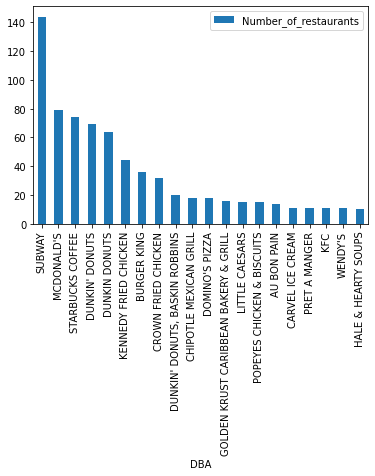

In [13]:
NYC_Restaurant_Chain_Top20=NYC_Restaurant_Chain.sort_values(by='Number_of_restaurants', ascending=False).head(20) # find chains with 20 highest count

NYC_Restaurant_Chain_Top20.plot.bar(x='DBA', y='Number_of_restaurants', rot=90) # plot DBA against number of retaurants


# Question 5 -- What fraction of all restaurants are chain restaurants?

--> Used nunique() to get the count of distinct Restaurants   
--> Got the total number of chained Restaurants   
--> To find the % of chained Restaurants, we divided Step 1 by Step 2

In [14]:
Total_Restaurants=NYC_Restaurant['RESTAURANT'].nunique()
Chained_Restaurants=NYC_Restaurant_Chain['Number_of_restaurants'].sum()

In [15]:
Perc_of_Chained_Restaurants=(Chained_Restaurants/Total_Restaurants)*100
Perc_of_Chained_Restaurants

16.47221672928614

# Question 6 -- Plot the number of non-chain restaurants in each BORO

--> Finding the  Non Chained DBA using set and set substraction    
--> Filtering the Dataset  where DBA is equal to the list containing NON-Chained DBA     
--> Filtering the Dataset further to store all DBA's except "Missing"    
--> Grouping the Resultant Dataframe to by BORO and counting the number of unique non chained Restaurants in each BORO

In [16]:
# Finding out Non Chained DBA/Restaurant

Chained_DBA=list(NYC_Restaurant_Chain['DBA'])
All_DBA=list(NYC_Restaurant['DBA'])
Non_Chained_DBA = list(set(All_DBA) - set(Chained_DBA))

<AxesSubplot:xlabel='BORO'>

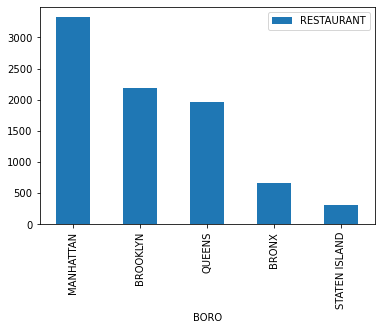

In [17]:
NYC_Non_Chained_Restaurant = NYC_Restaurant[NYC_Restaurant['DBA'].isin(Non_Chained_DBA)]
NYC_Non_Chained_Restaurant = NYC_Non_Chained_Restaurant[NYC_Non_Chained_Restaurant['BORO']!='Missing']
NYC_Non_Chained_Restaurant[['BORO','RESTAURANT']].drop_duplicates().groupby('BORO').agg('count').reset_index(drop=False).sort_values(by='RESTAURANT', ascending=False).plot.bar(x='BORO', y='RESTAURANT', rot=90)

# Question 7 -- Plot the fraction of non-chain restaurants in each boro.

--> Grouping the NYC_Non_Chained_Restaurant Dataframe  by BORO and counting the number of unique non chained Restaurants in each BORO     
--> Finding the Total Restaurants by BORO in NYC_Restaurant    
--> Inner Joining Total_Restaurants_per_BORO with Non_chained_Restaurants_per_BORO to get a combined table   
--> Dividing RESTAURANT_non_chained/RESTAURANT_total to get the fraction_non_chained per BORO

<AxesSubplot:xlabel='BORO'>

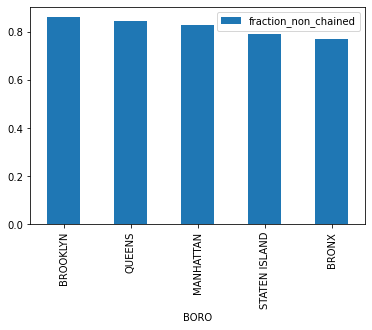

In [18]:
#Grouping the NYC_Non_Chained_Restaurant Dataframe  by BORO and counting the number of unique non chained Restaurants in each BORO
Non_chained_Restaurants_per_BORO=NYC_Non_Chained_Restaurant[['BORO','RESTAURANT']].drop_duplicates().groupby('BORO').agg('count').reset_index(drop=False)

#Finding the Total Restaurants by BORO in NYC_Restaurant 
Total_Restaurants_per_BORO=NYC_Restaurant[['BORO','RESTAURANT']].drop_duplicates().groupby('BORO').agg('count').reset_index(drop=False)

#Inner Joining Total_Restaurants_per_BORO with Non_chained_Restaurants_per_BORO to get a combined table
Restaurants_per_BORO_merged=Total_Restaurants_per_BORO.merge(Non_chained_Restaurants_per_BORO, left_on='BORO', right_on='BORO',suffixes=('_total', '_non_chained'))

#Dividing RESTAURANT_non_chained/RESTAURANT_total to get the fraction_non_chained per BORO
Restaurants_per_BORO_merged['fraction_non_chained']=Restaurants_per_BORO_merged['RESTAURANT_non_chained']/Restaurants_per_BORO_merged['RESTAURANT_total']

Restaurants_per_BORO_merged.sort_values(by='fraction_non_chained', ascending=False).plot.bar(x='BORO', y='fraction_non_chained', rot=90)

##### Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants? - 
###### No, As We can see in the below table, Manhattan has the highest number of Non_Chained_restaurants (3323) with Fraction being 0.83052 but BROOKLYN has highest fraction (0.86) followed by Queens (0.84)

In [19]:
Restaurants_per_BORO_merged # To show that boro with the most independent restaurants are not also the one with the highest ratio of independent restaurants

,BORO,RESTAURANT_total,RESTAURANT_non_chained,fraction_non_chained
0,BRONX,855,659,0.770760
1,BROOKLYN,2529,2180,0.862001
2,MANHATTAN,4001,3323,0.830542
3,QUEENS,2321,1968,0.847910
4,STATEN ISLAND,394,312,0.791878


# Question 8 -- Plot the popularity of cuisines.

--> Finding the count of Restaurants serving a particular Cuisine by grouping NYC_Restaurant by Cuisine and getting the count.    
--> Plotting Bargraph for Top 20 Cuisines. 

<AxesSubplot:xlabel='CUISINE DESCRIPTION'>

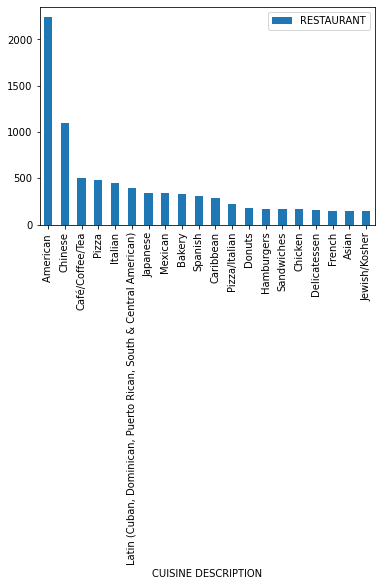

In [20]:
#Finding the count of Restaurants serving a particular Cuisine by grouping NYC_Restaurant by Cuisine and getting the count. 
NYC_Restaurant_Cuisines=NYC_Restaurant[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates().groupby('CUISINE DESCRIPTION').agg('count').reset_index(drop=False).sort_values(by='RESTAURANT', ascending=False)

NYC_Restaurant_Cuisines.head(20).plot.bar(x='CUISINE DESCRIPTION', y='RESTAURANT', rot=90)

##### Which cuisines are the most well-represented among all restaurants?
###### American, Chinese and Coffee/Tea are 3 most popular Cuisine 

# Question 9 -- Plot the cuisines among restaurants which never got cited for violations

--> Grouping NYC_Restaurant by Restaurant and counting the number of Violations by each Restaurant     
--> Filtering the resultant Dataframe where Count of Violations ==0 to get NYC_Restaurant_NO_VIOLATIONS Dataframe    
--> Inner Joining NYC_Restaurant and NYC_Restaurant_NO_VIOLATIONS to get data only for restaurants which never had Violations   
--> Grouping the Resultant Dataframe by Cuisines and getting the count of unique Restaurants serving the particular Cuisine   

In [21]:
#Grouping NYC_Restaurant by Restaurant and counting the number of Violations by each Restaurant
NYC_Restaurant_VIOLATIONS=NYC_Restaurant[['RESTAURANT','VIOLATION CODE']].groupby('RESTAURANT').agg('count').reset_index(drop=False).sort_values(by='RESTAURANT', ascending=False)

#Filtering the Dataframe where Count of Violations ==0 t
NYC_Restaurant_NO_VIOLATIONS=(NYC_Restaurant_VIOLATIONS[NYC_Restaurant_VIOLATIONS['VIOLATION CODE']==0])
NYC_Restaurant_NO_VIOLATIONS.rename(columns={'VIOLATION CODE':'COUNT_VIOLATIONS'}, inplace=True)

/var/folders/wh/f1gf_vp175112kx_fb3lwg5c0000gn/T/ipykernel_52652/2052988172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYC_Restaurant_NO_VIOLATIONS.rename(columns={'VIOLATION CODE':'COUNT_VIOLATIONS'}, inplace=True)


In [22]:
#Inner Joining NYC_Restaurant and NYC_Restaurant_NO_VIOLATIONS to get data only for restaurants which never had Violations   
NYC_Restaurant_NO_VIOLATIONS_data=NYC_Restaurant.merge( NYC_Restaurant_NO_VIOLATIONS, on='RESTAURANT')

<AxesSubplot:xlabel='CUISINE DESCRIPTION'>

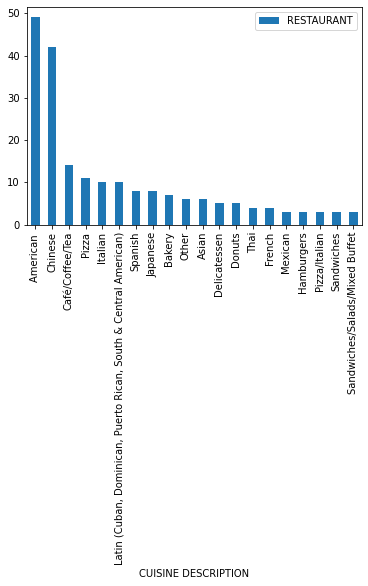

In [23]:
# Grouping the Resultant Dataframe by Cuisines and getting the count of unique Restaurants serving the particular Cuisine  
NYC_Clean_Restaurants_Cuisines=NYC_Restaurant_NO_VIOLATIONS_data[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates().groupby('CUISINE DESCRIPTION').agg('count').reset_index(drop=False).sort_values(by='RESTAURANT', ascending=False)
NYC_Clean_Restaurants_Cuisines.head(20).plot.bar(x='CUISINE DESCRIPTION', y='RESTAURANT', rot=90)

# Question 10 -- What cuisines tend to be the “cleanest”?

--> Finding the cuisines being served in more than 20 Restaurants and count of number of restaurants where they are beng served     
--> Finding the Cuisines which are being served in Clean Restaurants , count of number of restaurants where they are beng served    
--> Joining it with NYC_Restaurant_Cuisines_atleast_20rest to get the Total Number of Restaurants serving the same Cuisine.     
--> Dividing Step 2 by Step 1 to get the Clean Ratio

In [24]:
#Finding out Cuisines which are being served in more than 20 restaurants
NYC_Restaurant_Cuisines_atleast_20rest=NYC_Restaurant_Cuisines[NYC_Restaurant_Cuisines['RESTAURANT']>20]

#Inner Joining Table which stores Cuisines being served in more than 20 restaurants with Table storing Cuisines being served in clean restaurants
Restaurants_per_Cuisine_merged=NYC_Restaurant_Cuisines_atleast_20rest.merge(NYC_Clean_Restaurants_Cuisines, on='CUISINE DESCRIPTION',suffixes=('_total', '_clean'))

#Clean Ratio= Total Restaurants/Clean Restaurants
Restaurants_per_Cuisine_merged['Clean_Ratio']=Restaurants_per_Cuisine_merged['RESTAURANT_clean']/Restaurants_per_Cuisine_merged['RESTAURANT_total']

Restaurants_per_Cuisine_merged.sort_values(by='Clean_Ratio', ascending=False).head(10)

,CUISINE DESCRIPTION,RESTAURANT_total,RESTAURANT_clean,Clean_Ratio
37,Soul Food,22,2,0.090909
35,Vietnamese/Cambodian/Malaysia,32,2,0.062500
24,Other,103,6,0.058252
40,Soups & Sandwiches,21,1,0.047619
39,Barbecue,21,1,0.047619
38,Continental,21,1,0.047619
18,Asian,146,6,0.041096
1,Chinese,1098,42,0.038251
31,Greek,55,2,0.036364
36,Peruvian,28,1,0.035714


# Question 11 -- What are the most common violations in each borough?

In [25]:
#Remove rows where the borough is listed as "Missing" by changing the "BORO" value for these rows to NaN
missing_mask = (NYC_Restaurant['BORO'] == 'Missing')
NYC_Restaurant_complete_boro = NYC_Restaurant.copy()
NYC_Restaurant_complete_boro.loc[missing_mask, 'BORO'] = np.nan
BORO = NYC_Restaurant_complete_boro["BORO"] # create a series with all the boroughs
VIO = NYC_Restaurant_complete_boro["VIOLATION DESCRIPTION"] #create a series with all the violations
Crosstab = pd.crosstab(VIO,BORO) #create a crosstab with the violations as the index and the boroughs as the columns and the counts in the middle
Crosstab.idxmax() #find the indexes max for each column

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

# Question 12 -- What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In [26]:
Crosstab_normalized = pd.crosstab(VIO,BORO ,normalize= "index" ).reset_index()#Create a crosstab that has normalized for Violations

# Soring the names of BORO in a list
BORO_LIST=list(Crosstab_normalized.columns)[1:]

#Using melt() to convert the Crosstab_normalized dataframe from wide to long format
Melted_Crosstab=pd.melt(Crosstab_normalized,id_vars='VIOLATION DESCRIPTION', value_vars=BORO_LIST)

#Getting the maximum frequency of violation for each BORO
Max_Violation_frequency_per_BORO= Melted_Crosstab.groupby(['BORO'])['value'].agg('max').reset_index()

#Joining Max_Violation_frequency_per_BORO with Melted_Crosstab to get the Violation Description for max frequency to "get the Violations with same value per BORO (Tie)"
Final_df=Melted_Crosstab.merge(Max_Violation_frequency_per_BORO, on=['BORO', 'value'])
Final_df[['BORO','VIOLATION DESCRIPTION','value']]

,BORO,VIOLATION DESCRIPTION,value
0,BRONX,Unprotected food re-served.,0.500000
1,BROOKLYN,Precooked potentially hazardous food from comm...,0.714286
2,MANHATTAN,Out-of package sale of tobacco products observed.,1.000000
3,MANHATTAN,Potable water supply inadequate. Water or ice ...,1.000000
4,QUEENS,Caloric content range (minimum to maximum) not...,1.000000
5,QUEENS,"Harmful, noxious gas or vapor detected. CO ~1 ...",1.000000
6,QUEENS,Raw food not properly washed prior to serving.,1.000000
7,STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po...",0.090909


# Question 13 -- How many phone area codes correspond to a single zipcode?

In [27]:
#Make a function that extracts only the area code of a phone number (first 3 digits)
def get_area_code(phone_number):
    return phone_number[:3]

#Apply the get_area_code() function to get all area codes in the data set
NYC_Restaurant['AREA CODE'] = NYC_Restaurant['PHONE'].map(get_area_code)

#Make a crosstab that determines the count of combinations of area codes and zip codes. Return True if the count is greater
#than 0. Sum up the number of Trues for each row and return True if the row sum is exactly 1 (meaning that the area code only
#matched with one zip code)
single_zip_booleans = (pd.crosstab(NYC_Restaurant['AREA CODE'],NYC_Restaurant['ZIPCODE'])>0).sum(axis=1)==1

#Sum the number of Trues from above to get the total number of area codes that correspond to one zip code
sum(single_zip_booleans)

34

# Question 14 -- Find common misspellings of street names

In [28]:
#Return only the last word in a street name
def last_word_street(street_name):
    return street_name.split()[-1]


#Take out the last word in a street name to get the base left over
def street_base(street_name):
    last_word = street_name.split()[-1]
    return street_name.rstrip(last_word).rstrip(' ')


#Create new "STREET TYPE", "STREET BASE", and "STREET BASE & ZIP COLUMNS"
NYC_Restaurant['STREET TYPE'] = NYC_Restaurant['STREET'].map(last_word_street)
NYC_Restaurant['STREET BASE'] = NYC_Restaurant['STREET'].map(street_base)
NYC_Restaurant['STREET BASE & ZIP'] = NYC_Restaurant['STREET BASE'] + ' ' + NYC_Restaurant['ZIPCODE']


#Make sure that we only look at rows where the street base is non-empty
street_base_nonempty_mask = NYC_Restaurant['STREET BASE']!=''
street_table = NYC_Restaurant[street_base_nonempty_mask]


#Remove any duplicates and only include the newly created columns
street_table = street_table[['STREET BASE & ZIP','ZIPCODE','STREET TYPE']].drop_duplicates()


#Merge the above table with itself
street_table_merged = street_table.merge(street_table,on='STREET BASE & ZIP')


#Only include rows where the two "STREET TYPE" columns don't match up
different_street_types = street_table_merged[street_table_merged['STREET TYPE_x']!=street_table_merged['STREET TYPE_y']]


#Create a cross tab showing the combinations of "STREET TYPE" for each "STREET BASE & ZIP" row
street_crosstab = pd.crosstab(different_street_types['STREET TYPE_x'],different_street_types['STREET TYPE_y']).reset_index()

In [30]:
# Soring the names of Street_Y in a list
Street_LIST=list(street_crosstab.columns)[2:]

#Using melt() to convert the Crosstab_normalized dataframe from wide to long format
Melted_Crosstab=pd.melt(street_crosstab,id_vars='STREET TYPE_x', value_vars=Street_LIST)

#Filtering the Melted dataframe only for ['AVE','ST','PL','BOULEVARD','BULEVARD']
list_of_streets=['AVE','ST','PL','BOULEVARD','BULEVARD']
Melted_Crosstab=Melted_Crosstab[Melted_Crosstab['STREET TYPE_y'].isin (list_of_streets)] 

#Getting the maximum frequency for each STREET TYPE_y
Max_Street_frequency_per_Street_Name= Melted_Crosstab.groupby(['STREET TYPE_y'])['value'].agg('max').reset_index()

#Joining Max_Street_frequency_per_Street_Name with Melted_Crosstab to get the Street_x for max frequency
Final_df=Melted_Crosstab.merge(Max_Street_frequency_per_Street_Name, on=['STREET TYPE_y', 'value'])
Final_df[['STREET TYPE_y','STREET TYPE_x']]


,STREET TYPE_y,STREET TYPE_x
0,AVE,AVENUE
1,BOULEVARD,BLVD
2,BULEVARD,BLVD
3,BULEVARD,BOULEVARD
4,PL,PLACE
5,ST,STREET


As expected, most of the common street type misspellings are just alternations between their abbreviation and their full spellings. For instance, the most common misspellings of "AVE" is "AVENUE", "ST" is "STREET", "RD" is "ROAD", "PL" is "PLACE", "BOULEVARD" is "BLVD", and "BULEVARD" is "BLVD" and "BOULEVARD".